<a href="https://colab.research.google.com/github/nimnusmik/ML_project/blob/main/GBThackerton_%EB%9D%BC%EB%A9%98%EC%9D%B4_%EB%90%A0%EB%BB%94%ED%95%9C_%EB%96%A1%EB%B3%B6%EC%9D%B4_%EC%98%88%EC%84%A0%EC%BD%94%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 가져오기

In [ ]:
!pip install missingno

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
import os
import sys
from contextlib import contextmanager
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# from bayes_opt import BayesianOptimization
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 개발환경: macOS 코랩 이용
# 라이브러리 버전:
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
blis                             0.7.10
blosc2                           2.0.0
bokeh                            3.2.2
bqplot                           0.12.40
branca                           0.6.0
build                            1.0.3
CacheControl                     0.13.1
cachetools                       5.3.1
catalogue                        2.0.9
certifi                          2023.7.22
cffi                             1.15.1
chardet                          5.2.0
charset-normalizer               3.2.0
chex                             0.1.7
click                            8.1.7
click-plugins                    1.1.1
cligj                            0.7.2
cloudpickle                      2.2.1
cmake                            3.27.4.1
cmdstanpy                        1.1.0
colorcet                         3.0.1
colorlover                       0.3.0
colour                           0.1.5
community                        1.0.0b1
confection                       0.1.2
cons                             0.4.6
contextlib2                      21.6.0
contourpy                        1.1.0
convertdate                      2.4.0
cryptography                     41.0.3
cufflinks                        0.17.3
cvxopt                           1.3.2
cvxpy                            1.3.2
cycler                           0.11.0
cymem                            2.0.7
Cython                           3.0.2
dask                             2023.8.1
datascience                      0.17.6
db-dtypes                        1.1.1
dbus-python                      1.2.18
debugpy                          1.6.6
decorator                        4.4.2
defusedxml                       0.7.1
distributed                      2023.8.1
distro                           1.7.0
dlib                             19.24.2
dm-tree                          0.1.8
docutils                         0.18.1
dopamine-rl                      4.0.6
duckdb                           0.8.1
earthengine-api                  0.1.368
easydict                         1.10
ecos                             2.0.12
editdistance                     0.6.2
eerepr                           0.0.4
en-core-web-sm                   3.6.0
entrypoints                      0.4
ephem                            4.1.4
et-xmlfile                       1.1.0
etils                            1.4.1
etuples                          0.3.9
exceptiongroup                   1.1.3
fastai                           2.7.12
fastcore                         1.5.29
fastdownload                     0.0.7
fastjsonschema                   2.18.0
fastprogress                     1.0.3
fastrlock                        0.8.2
filelock                         3.12.2
Fiona                            1.9.4.post1
firebase-admin                   5.3.0
Flask                            2.2.5
flatbuffers                      23.5.26
flax                             0.7.2
folium                           0.14.0
fonttools                        4.42.1
frozendict                       2.3.8
frozenlist                       1.4.0
fsspec                           2023.6.0
future                           0.18.3
gast                             0.4.0
gcsfs                            2023.6.0
GDAL                             3.4.3
gdown                            4.6.6
geemap                           0.26.0
gensim                           4.3.2
geocoder                         1.38.1
geographiclib                    2.0
geopandas                        0.13.2
geopy                            2.3.0
gin-config                       0.5.0
glob2                            0.7
google                           2.0.3
google-api-core                  2.11.1
google-api-python-client         2.84.0
google-auth                      2.17.3
google-auth-httplib2             0.1.0
google-auth-oauthlib             1.0.0
google-cloud-bigquery            3.10.0
google-cloud-bigquery-connection 1.12.1
google-cloud-bigquery-storage    2.22.0
google-cloud-core                2.3.3
google-cloud-datastore           2.15.2
google-cloud-firestore           2.11.1
google-cloud-functions           1.13.2
google-cloud-language            2.9.1
google-cloud-storage             2.8.0
google-cloud-translate           3.11.3
google-colab                     1.0.0
google-crc32c                    1.5.0
google-pasta                     0.2.0
google-resumable-media           2.6.0
googleapis-common-protos         1.60.0
googledrivedownloader            0.4
graphviz                         0.20.1
greenlet                         2.0.2
grpc-google-iam-v1               0.12.6
grpcio                           1.57.0
grpcio-status                    1.48.2
gspread                          3.4.2
gspread-dataframe                3.3.1
gym                              0.25.2
gym-notices                      0.0.8
h5netcdf                         1.2.0
h5py                             3.9.0
holidays                         0.32
holoviews                        1.17.1
html5lib                         1.1
httpimport                       1.3.1
httplib2                         0.22.0
humanize                         4.7.0
hyperopt                         0.2.7
idna                             3.4
imageio                          2.31.3
imageio-ffmpeg                   0.4.8
imagesize                        1.4.1
imbalanced-learn                 0.10.1
imgaug                           0.4.0
importlib-metadata               6.8.0
importlib-resources              6.0.1
imutils                          0.5.4
inflect                          7.0.0
iniconfig                        2.0.0
intel-openmp                     2023.2.0
ipyevents                        2.0.2
ipyfilechooser                   0.6.0
ipykernel                        5.5.6
ipyleaflet                       0.17.3
ipython                          7.34.0
ipython-genutils                 0.2.0
ipython-sql                      0.5.0
ipytree                          0.2.2
ipywidgets                       7.7.1
itsdangerous                     2.1.2
jax                              0.4.14
jaxlib                           0.4.14+cuda11.cudnn86
jeepney                          0.7.1
jieba                            0.42.1
Jinja2                           3.1.2
joblib                           1.3.2
jsonpickle                       3.0.2
jsonschema                       4.19.0
jsonschema-specifications        2023.7.1
jupyter-client                   6.1.12
jupyter-console                  6.1.0
jupyter_core                     5.3.1
jupyter-server                   1.24.0
jupyterlab-pygments              0.2.2
jupyterlab-widgets               3.0.8
kaggle                           1.5.16
keras                            2.13.1
keyring                          23.5.0
kiwisolver                       1.4.5
langcodes                        3.3.0
launchpadlib                     1.10.16
lazr.restfulclient               0.14.4
lazr.uri                         1.0.6
lazy_loader                      0.3
libclang                         16.0.6
librosa                          0.10.1
lightgbm                         4.0.0
linkify-it-py                    2.0.2
lit                              16.0.6
llvmlite                         0.39.1
locket                           1.0.0
logical-unification              0.4.6
LunarCalendar                    0.0.9
lxml                             4.9.3
Markdown                         3.4.4
markdown-it-py                   3.0.0
MarkupSafe                       2.1.3
matplotlib                       3.7.1
matplotlib-inline                0.1.6
matplotlib-venn                  0.11.9
mdit-py-plugins                  0.4.0
mdurl                            0.1.2
miniKanren                       1.0.3
missingno                        0.5.2
mistune                          0.8.4
mizani                           0.9.3
mkl                              2023.2.0
ml-dtypes                        0.2.0
mlxtend                          0.22.0
more-itertools                   10.1.0
moviepy                          1.0.3
mpmath                           1.3.0
msgpack                          1.0.5
multidict                        6.0.4
multipledispatch                 1.0.0
multitasking                     0.0.11
murmurhash                       1.0.9
music21                          9.1.0
natsort                          8.4.0
nbclassic                        1.0.0
nbclient                         0.8.0
nbconvert                        6.5.4
nbformat                         5.9.2
nest-asyncio                     1.5.7
networkx                         3.1
nibabel                          4.0.2
nltk                             3.8.1
notebook                         6.5.5
notebook_shim                    0.2.3
numba                            0.56.4
numexpr                          2.8.5
numpy                            1.23.5
oauth2client                     4.1.3
oauthlib                         3.2.2
opencv-contrib-python            4.8.0.76
opencv-python                    4.8.0.76
opencv-python-headless           4.8.0.76
openpyxl                         3.1.2
opt-einsum                       3.3.0
optax                            0.1.7
orbax-checkpoint                 0.3.5
osqp                             0.6.2.post8
packaging                        23.1
pandas                           1.5.3
pandas-datareader                0.10.0
pandas-gbq                       0.17.9
pandocfilters                    1.5.0
panel                            1.2.2
param                            1.13.0
parso                            0.8.3
partd                            1.4.0
pathlib                          1.0.1
pathy                            0.10.2
patsy                            0.5.3
pexpect                          4.8.0
pickleshare                      0.7.5
Pillow                           9.4.0
pip                              23.1.2
pip-tools                        6.13.0
platformdirs                     3.10.0
plotly                           5.15.0
plotnine                         0.12.3
pluggy                           1.3.0
polars                           0.17.3
pooch                            1.7.0
portpicker                       1.5.2
prefetch-generator               1.0.3
preshed                          3.0.8
prettytable                      3.8.0
proglog                          0.1.10
progressbar2                     4.2.0
prometheus-client                0.17.1
promise                          2.3
prompt-toolkit                   3.0.39
prophet                          1.1.4
proto-plus                       1.22.3
protobuf                         3.20.3
psutil                           5.9.5
psycopg2                         2.9.7
ptyprocess                       0.7.0
py-cpuinfo                       9.0.0
py4j                             0.10.9.7
pyarrow                          9.0.0
pyasn1                           0.5.0
pyasn1-modules                   0.3.0
pycocotools                      2.0.7
pycparser                        2.21
pyct                             0.5.0
pydantic                         1.10.12
pydata-google-auth               1.8.2
pydot                            1.4.2
pydot-ng                         2.0.0
pydotplus                        2.0.2
PyDrive                          1.3.1
PyDrive2                         1.6.3
pyerfa                           2.0.0.3
pygame                           2.5.1
Pygments                         2.16.1
PyGObject                        3.42.1
PyJWT                            2.3.0
pymc                             5.7.2
PyMeeus                          0.5.12
pymystem3                        0.2.0
PyOpenGL                         3.1.7
pyOpenSSL                        23.2.0
pyparsing                        3.1.1
pyperclip                        1.8.2
pyproj                           3.6.0
pyproject_hooks                  1.0.0
pyshp                            2.3.1
PySocks                          1.7.1
pytensor                         2.14.2
pytest                           7.4.1
python-apt                       0.0.0
python-box                       7.1.1
python-dateutil                  2.8.2
python-louvain                   0.16
python-slugify                   8.0.1
python-utils                     3.7.0
pytz                             2023.3.post1
pyviz_comms                      3.0.0
PyWavelets                       1.4.1
PyYAML                           6.0.1
pyzmq                            23.2.1
qdldl                            0.1.7.post0
qudida                           0.0.4
ratelim                          0.1.6
referencing                      0.30.2
regex                            2023.6.3
requests                         2.31.0
requests-oauthlib                1.3.1
requirements-parser              0.5.0
rich                             13.5.2
rpds-py                          0.10.2
rpy2                             3.4.2
rsa                              4.9
scikit-image                     0.19.3
scikit-learn                     1.2.2
scipy                            1.11.2
scooby                           0.7.2
scs                              3.2.3
seaborn                          0.12.2
SecretStorage                    3.3.1
Send2Trash                       1.8.2
setuptools                       67.7.2
shapely                          2.0.1
six                              1.16.0
sklearn-pandas                   2.2.0
smart-open                       6.4.0
sniffio                          1.3.0
snowballstemmer                  2.2.0
sortedcontainers                 2.4.0
soundfile                        0.12.1
soupsieve                        2.5
soxr                             0.3.6
spacy                            3.6.1
spacy-legacy                     3.0.12
spacy-loggers                    1.0.4
Sphinx                           5.0.2
sphinxcontrib-applehelp          1.0.7
sphinxcontrib-devhelp            1.0.5
sphinxcontrib-htmlhelp           2.0.4
sphinxcontrib-jsmath             1.0.1
sphinxcontrib-qthelp             1.0.6
sphinxcontrib-serializinghtml    1.1.9
SQLAlchemy                       2.0.20
sqlparse                         0.4.4
srsly                            2.4.7
statsmodels                      0.14.0
sympy                            1.12
tables                           3.8.0
tabulate                         0.9.0
tbb                              2021.10.0
tblib                            2.0.0
tenacity                         8.2.3
tensorboard                      2.13.0
tensorboard-data-server          0.7.1
tensorflow                       2.13.0
tensorflow-datasets              4.9.2
tensorflow-estimator             2.13.0
tensorflow-gcs-config            2.13.0
tensorflow-hub                   0.14.0
tensorflow-io-gcs-filesystem     0.33.0
tensorflow-metadata              1.14.0
tensorflow-probability           0.20.1
tensorstore                      0.1.41
termcolor                        2.3.0
terminado                        0.17.1
text-unidecode                   1.3
textblob                         0.17.1
tf-slim                          1.1.0
thinc                            8.1.12
threadpoolctl                    3.2.0
tifffile                         2023.8.30
tinycss2                         1.2.1
toml                             0.10.2
tomli                            2.0.1
toolz                            0.12.0
torch                            2.0.1+cu118
torchaudio                       2.0.2+cu118
torchdata                        0.6.1
torchsummary                     1.5.1
torchtext                        0.15.2
torchvision                      0.15.2+cu118
tornado                          6.3.2
tqdm                             4.66.1
traitlets                        5.7.1
traittypes                       0.2.1
triton                           2.0.0
tweepy                           4.13.0
typer                            0.9.0
types-setuptools                 68.2.0.0
typing_extensions                4.5.0
tzlocal                          5.0.1
uc-micro-py                      1.0.2
uritemplate                      4.1.1
urllib3                          2.0.4
vega-datasets                    0.9.0
wadllib                          1.3.6
wasabi                           1.1.2
wcwidth                          0.2.6
webcolors                        1.13
webencodings                     0.5.1
websocket-client                 1.6.2
Werkzeug                         2.3.7
wheel                            0.41.2
widgetsnbextension               3.6.5
wordcloud                        1.9.2
wrapt                            1.15.0
xarray                           2023.7.0
xarray-einstats                  0.6.0
xgboost                          1.7.6
xlrd                             2.0.1
xyzservices                      2023.7.0
yarl                             1.9.2
yellowbrick                      1.5
yfinance                         0.2.28
zict                             3.0.0
zipp                             3.16.2

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.3
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.4.1
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.2
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==3.0.2
dask==2023.8.1
datascie

In [ ]:
#!pip list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파일 읽어오기

In [ ]:
file_path = '/content/drive/MyDrive/GBTHackerton/'

In [ ]:
oil_train = pd.read_csv(file_path + 'train.csv')

In [ ]:
oil_train.head(3)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,-0.996688,2011,7,-1.000000,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,1
1,TRAIN_00001,COMPONENT2,-0.997615,2021,51,-0.962963,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,-0.990356,2015,2,-1.000000,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,0


In [ ]:
oil_test = pd.read_csv(file_path + 'test.csv')

In [ ]:
oil_test.head(3)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,-0.995011,2014,-1.00000,0,0,3,43,45,0.0,2,0,0,15,0,0,85.5,1007
1,TEST_0001,COMPONENT3,-0.984052,2015,-1.00000,0,0,0,0,165,0.0,1,0,1,62,0,0,155.5,35
2,TEST_0002,COMPONENT3,-0.977618,2021,-0.90328,0,0,1,12,101,0.0,16,1,0,158,0,0,46.8,1480


In [ ]:
oil_ss = pd.read_csv(file_path + 'sample_submission.csv')

In [ ]:
oil_ss.head(5)

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


# 데이터 특성 확인 (train 데이터)

In [ ]:
oil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  float64
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  float64
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

## 변수 의미 (train)
- ID : ID
- `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
- `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
- `YEAR` : 오일 진단 년도(Year)
- `SAMPLE_TRANSFER_DAY` : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
- `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
- `AG` : 은(Silver) 함유량
- `AL` : 알루미늄(Aluminium) 함유량
- `B` : 붕소(Boron) 함유량
- `BA` : 바륨(Barium) 함유량
- `BE` : 베릴륨(Beryllium) 함유량
- `CA` : 칼슘(Calcium) 함유량
- `CD` : 카드뮴(Cadmium) 함유량
- `CO` : 코발트(Cobolt) 함유량
- `CR` : 크로뮴(Chromium) 함유량
- `CU` : 구리(Copper) 함유량
- `FH2O` : 물(Water) 수치(By FT-IR)
- `FNOX` : 질소산화물(Nox) 수치(By FT-IR)
- `FOPTIMETHGLY` : 비식별화
- `FOXID` : 산화(Oxidation) 수치(By FT-IR)
- `FSO4` : 황산염(S04) 수치(By FT-IR)
- `FTBN` : 염기성 첨가제물질 수치(By FT-IR)
- `FE` : 철(Iron) 함유량
- `FUEL` : 연료 함유량
- `H2O` : 물 함유량
- `K` : 칼륨(Potassium) 함유량
- `LI` : 리튬(Lithium) 함유량
- `MG` : 마그네슘(Magnesium) 함유량
- `MN` : 망가니즈(Manganese) 함유량
- `MO` : 몰리브덴(Molybdenum) 함유량
- `NA` : 나트륨(Sodium) 함유량
- `NI` : 니켈(Nickel) 함유량
- `P` : 인(Phosphorus) 함유량
- `PB` : 납(Lead) 함유량
- `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
- `S` : 황(Sulphur) 함유량
- `SB` : 안티몬(Antimony) 함유량
- `SI` : 규소(Silicone) 함유량
- `SN` : 주석(Tin) 함유량
- `SOOTPERCENTAGE` : 그을음 정도
- `TI` : 티타늄(Titanium) 함유량
- `U100` : 100㎛ 이상 입자 크기(Particle Count)
- `U75` : 75㎛ 이상 입자 크기(Particle Count)
- `U50` : 50㎛ 이상 입자 크기(Particle Count)
- `U25` : 25㎛ 이상 입자 크기(Particle Count)
- `U20` : 20㎛ 이상 입자 크기(Particle Count)
- `U14` : 14㎛ 이상 입자 크기(Particle Count)
- `U6` : 6㎛ 이상 입자 크기(Particle Count)
- `U4` : 4㎛ 이상 입자 크기(Particle Count)
- `V` : 바나듐(Vanadium) 함유량
- `V100` : 점도(Viscosity) @ 100 degrees
- `V40` : 점도(Viscosity) @ 40 degrees
- `ZN` : 아연(Zinc) 함유량
- `Y_LABEL` : 오일 정상 여부(0 : 정상, 1 : 이상)

In [ ]:
oil_train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
mean,-0.985373,2013.652501,7.600568,-0.960335,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,...,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825,0.214544
std,0.028735,3.964758,11.681628,0.116406,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,...,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393,0.410520
min,-1.000000,2007.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,-0.995536,2010.000000,3.000000,-1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,...,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000,0.000000
50%,-0.991637,2014.000000,5.000000,-1.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,...,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000,0.000000
75%,-0.980937,2017.000000,8.000000,-0.955556,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,...,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000,0.000000
max,1.000000,2022.000000,368.000000,1.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609.000000,...,1651.000000,2932.000000,11296.000000,412627.000000,844421.000000,17.000000,29.900000,2840.500000,2132.000000,1.000000


 COMPONENT_ARBITRARY (object 형 변수) 확인

In [ ]:
oil_train.groupby(['COMPONENT_ARBITRARY']).mean()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
COMPONENT_ARBITRARY,,,,,,,,,,,,,,,,,,,,,
COMPONENT1,-0.986054,2013.729563,7.731620,-0.959173,0.025193,10.285861,62.665553,0.643445,0.012596,1397.478406,...,NaN,NaN,NaN,NaN,NaN,0.024422,13.57623,102.678103,1161.010283,0.100257
COMPONENT2,-0.986206,2013.718912,7.530225,-0.961256,0.024180,18.402850,61.961572,0.780656,0.003454,1332.214162,...,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.010794,NaN,52.720695,505.785838,0.173143
COMPONENT3,-0.984818,2013.494043,7.700426,-0.961531,0.028227,12.999007,65.379858,0.703972,0.004539,1315.180567,...,NaN,NaN,NaN,NaN,NaN,0.082837,NaN,136.411370,241.379574,0.304113
COMPONENT4,-0.984588,2014.443385,6.348033,-0.953130,0.013111,5.767580,64.659118,0.585221,0.000000,1753.070322,...,NaN,NaN,NaN,NaN,NaN,0.011919,NaN,69.310012,1081.669845,0.106079


전체적인 데이터 구조 파악하기

In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
#uniqueSample = []


for item in list(oil_train):
    dataFeatures.append(item)

#데이터 타입
for item in dataFeatures:
    dataType.append(oil_train[item].dtype.name)

#결측치 개수
for item in dataFeatures:
    null.append(len(oil_train[oil_train[item].isnull() == True]))

#결측치 비율
for item in dataFeatures:
    nullPCT.append(round(len(oil_train[oil_train[item].isnull() == True])/len(oil_train[item])*100,2))


#가장 작은 값
for item in dataFeatures:
    minValue.append(oil_train[item].min())


#가장 큰 값
for item in dataFeatures:
    maxValue.append(oil_train[item].max())


#고유값 개수
for item in dataFeatures:
    unique.append(oil_train[item].nunique())


#고유값 샘플
#for item in dataFeatures:
#    uniqueSample.append(oil_train[item].unique()[0:2])


#데이터프레임 재생성
oil_train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
#    'uniqueSample':uniqueSample
})
oil_train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4
2,ANONYMOUS_1,float64,0,0.00,2951,-1.0,1.0
3,YEAR,int64,0,0.00,16,2007,2022
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368
5,ANONYMOUS_2,float64,0,0.00,842,-1.0,1.0
6,AG,int64,0,0.00,4,0,3
7,AL,int64,0,0.00,328,0,4630
8,B,int64,0,0.00,504,0,2051
9,BA,int64,0,0.00,38,0,216


결측치 확인 (0~25)

<Axes: >

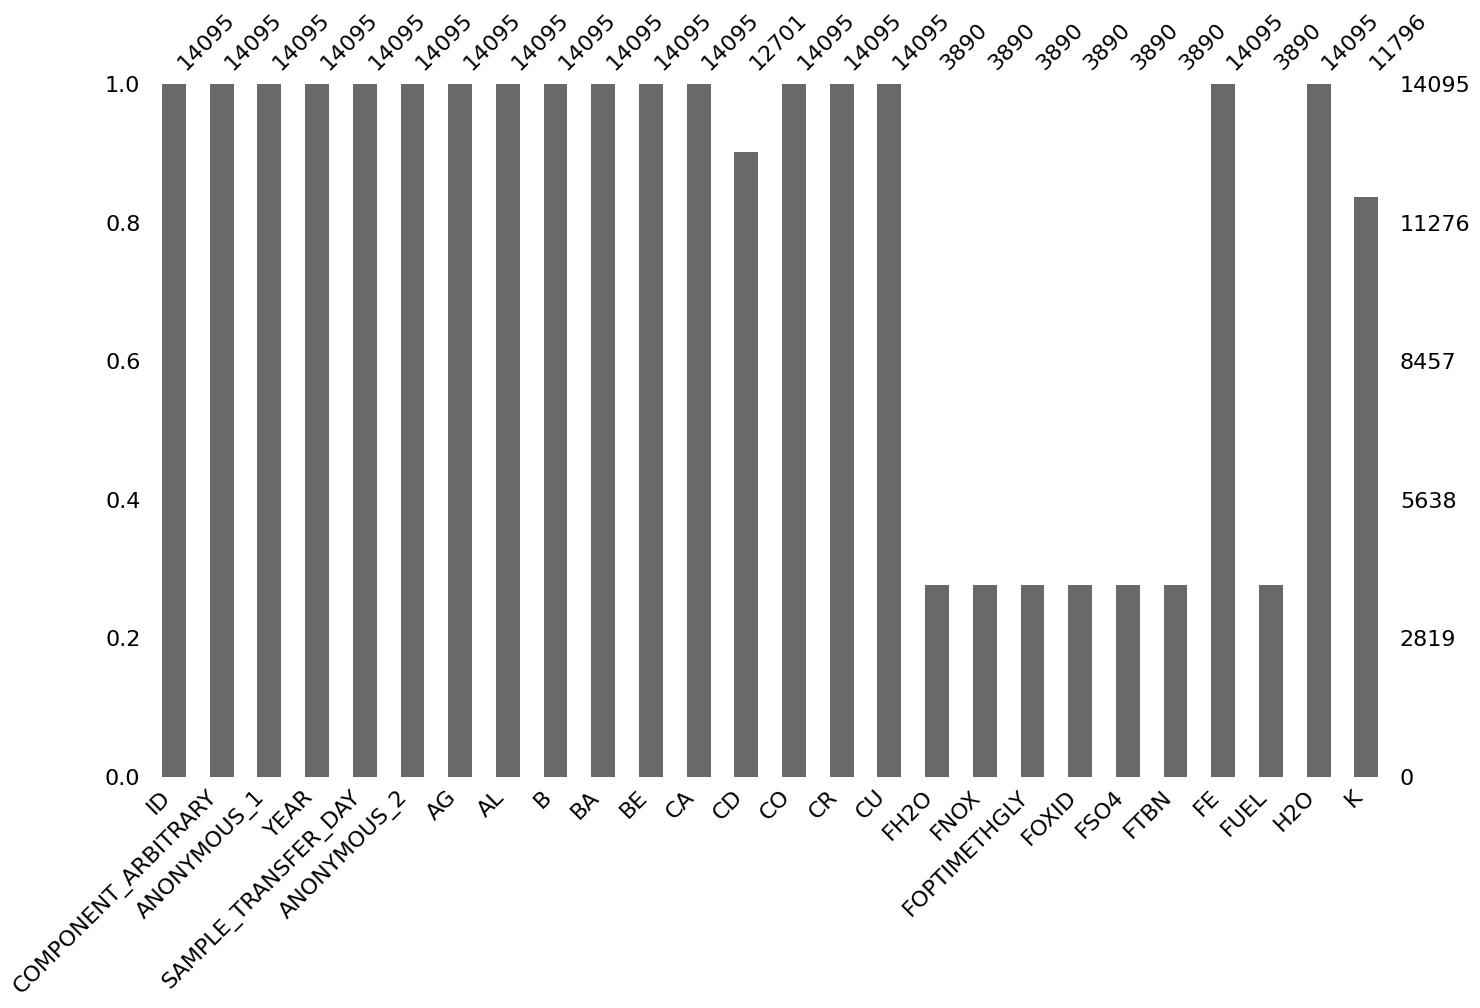

In [ ]:
import missingno as msno
msno.bar(oil_train.iloc[:, :26], figsize=(16,9))

결측치 확인 (26~)

<Axes: >

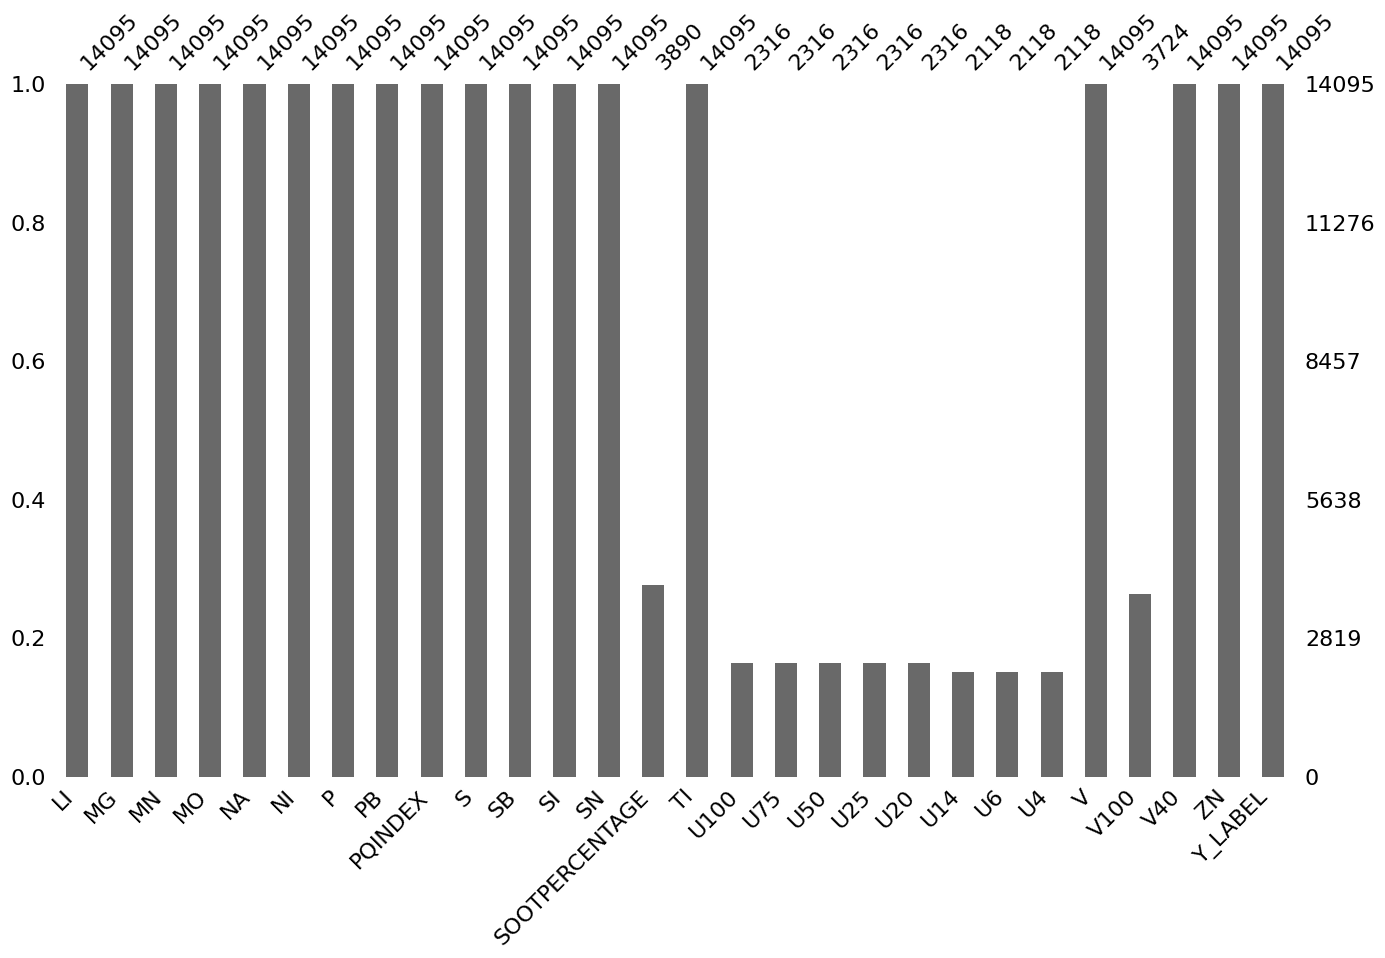

In [ ]:
msno.bar(oil_train.iloc[:, 26:], figsize=(16,9))

In [ ]:
oil_train.Y_LABEL.value_counts()

0    11071
1     3024
Name: Y_LABEL, dtype: int64

<Axes: xlabel='Y_LABEL', ylabel='count'>

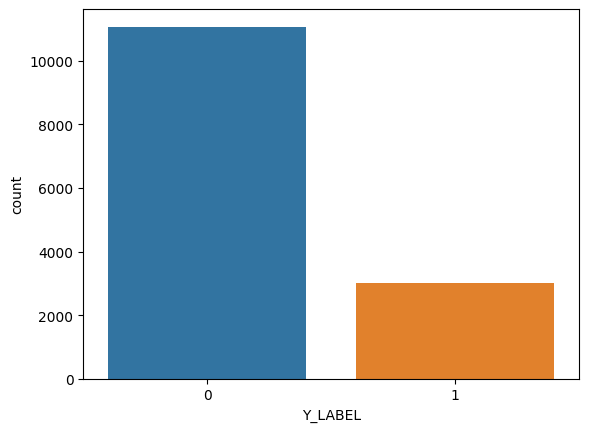

In [ ]:
sns.countplot(data=oil_train, x='Y_LABEL')

타겟 데이터가 균등하진 않음 (3:1정도)

# 데이터 특성 확인 (Test 데이터)

In [ ]:
oil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   float64
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   float64
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

## 변수 의미 (test)
- `ID` : ID
- `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
- `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
- `YEAR` : 오일 진단 년도(Year)
- `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
- `AG` : 은(Silver) 함유량
- `CO` : 코발트(Cobolt) 함유량
- `CR` : 크로뮴(Chromium) 함유량
- `CU` : 구리(Copper) 함유량
- `FE` : 철(Iron) 함유량
- `FUEL` : 연료 함유량
- `H2O` : 물 함유량
- `MN` : 망가니즈(Manganese) 함유량
- `MO` : 몰리브덴(Molybdenum) 함유량
- `NI` : 니켈(Nickel) 함유량
- `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
- `TI` : 티타늄(Titanium) 함유량
- `V` : 바나듐(Vanadium) 함유량
- `V40` : 점도(Viscosity) @ 40 degrees
- `ZN` : 아연(Zinc) 함유량

In [ ]:
oil_test.describe()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
count,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000,6041.000000
mean,-0.985012,2013.656514,-0.959223,0.026817,0.030790,3.155438,37.397285,198.615295,0.024599,3.127462,25.042212,0.883463,475.091210,0.797219,0.044529,110.495135,581.186393
std,0.032952,3.976759,0.119303,0.179981,0.268141,21.120731,153.922102,690.985612,0.335461,11.315785,62.245538,5.708857,1812.652841,7.366433,0.359595,45.381679,530.799040
min,-1.000000,2007.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,1.000000
25%,-0.995454,2010.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,73.000000,38.000000
50%,-0.991338,2014.000000,-1.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,112.100000,489.000000
75%,-0.980630,2017.000000,-0.954074,0.000000,0.000000,2.000000,17.000000,143.000000,0.000000,2.000000,8.000000,0.000000,173.000000,0.000000,0.000000,138.200000,1115.000000
max,0.625961,2022.000000,1.000000,2.000000,13.000000,1415.000000,4113.000000,30407.000000,15.200000,472.000000,765.000000,155.000000,48976.000000,280.000000,13.000000,388.400000,1932.000000


In [ ]:
oil_test.groupby(['COMPONENT_ARBITRARY']).mean()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
COMPONENT_ARBITRARY,,,,,,,,,,,,,,,,,
COMPONENT1,-0.986427,2013.782843,-0.959741,0.025795,0.012597,2.046791,10.575285,29.414517,0.003599,0.657469,72.391722,0.166767,26.732454,0.094181,0.028194,102.691950,1160.566887
COMPONENT2,-0.981939,2013.864048,-0.957865,0.022155,0.016113,0.515609,53.348439,18.659617,0.006445,0.160121,0.590131,0.027190,29.644512,0.035247,0.009063,53.815086,498.013092
COMPONENT3,-0.985467,2013.406157,-0.961071,0.030122,0.047997,4.998676,38.900695,372.383317,0.045084,5.720622,4.248593,1.661039,923.324727,1.529295,0.068520,138.342784,228.999007
COMPONENT4,-0.983121,2014.600000,-0.945069,0.016667,0.011111,0.102778,104.983333,20.283333,0.000000,0.988889,47.727778,0.038889,18.505556,0.011111,0.016667,69.282500,1083.191667


In [ ]:
oil_train['COMPONENT_ARBITRARY'].value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

<Axes: xlabel='COMPONENT_ARBITRARY', ylabel='count'>

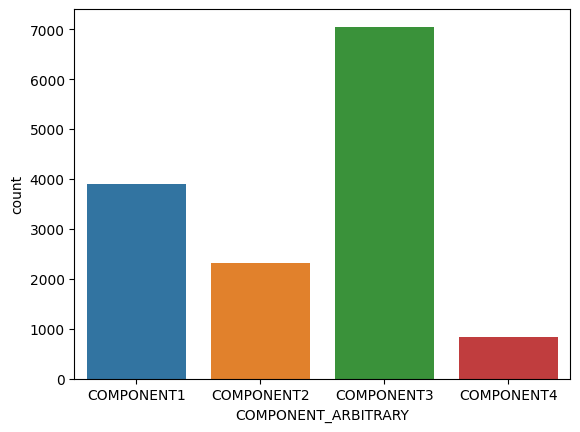

In [ ]:
sns.countplot(data = oil_train, x='COMPONENT_ARBITRARY',
              order = ['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4'])

In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
#uniqueSample = []


for item in list(oil_test):
    dataFeatures.append(item)

#데이터 타입
for item in dataFeatures:
    dataType.append(oil_test[item].dtype.name)

#결측치 개수
for item in dataFeatures:
    null.append(len(oil_test[oil_train[item].isnull() == True]))

#결측치 비율
for item in dataFeatures:
    nullPCT.append(round(len(oil_test[oil_train[item].isnull() == True])/len(oil_test[item])*100,2))


#가장 작은 값
for item in dataFeatures:
    minValue.append(oil_test[item].min())


#가장 큰 값
for item in dataFeatures:
    maxValue.append(oil_test[item].max())


#고유값 개수
for item in dataFeatures:
    unique.append(oil_test[item].nunique())


#고유값 샘플
#for item in dataFeatures:
#    uniqueSample.append(oil_train[item].unique()[0:2])


#데이터프레임 재생성
oil_test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
#    'uniqueSample':uniqueSample
})
oil_test_info

<ipython-input-26-48d4975edeb5>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  null.append(len(oil_test[oil_train[item].isnull() == True]))
<ipython-input-26-48d4975edeb5>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nullPCT.append(round(len(oil_test[oil_train[item].isnull() == True])/len(oil_test[item])*100,2))


,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4
2,ANONYMOUS_1,float64,0,0.0,2264,-1.0,0.625961
3,YEAR,int64,0,0.0,16,2007,2022
4,ANONYMOUS_2,float64,0,0.0,629,-1.0,1.0
5,AG,int64,0,0.0,3,0,2
6,CO,int64,0,0.0,6,0,13
7,CR,int64,0,0.0,80,0,1415
8,CU,int64,0,0.0,374,0,4113
9,FE,int64,0,0.0,891,0,30407


결측치 확인 (0~10)

<Axes: >

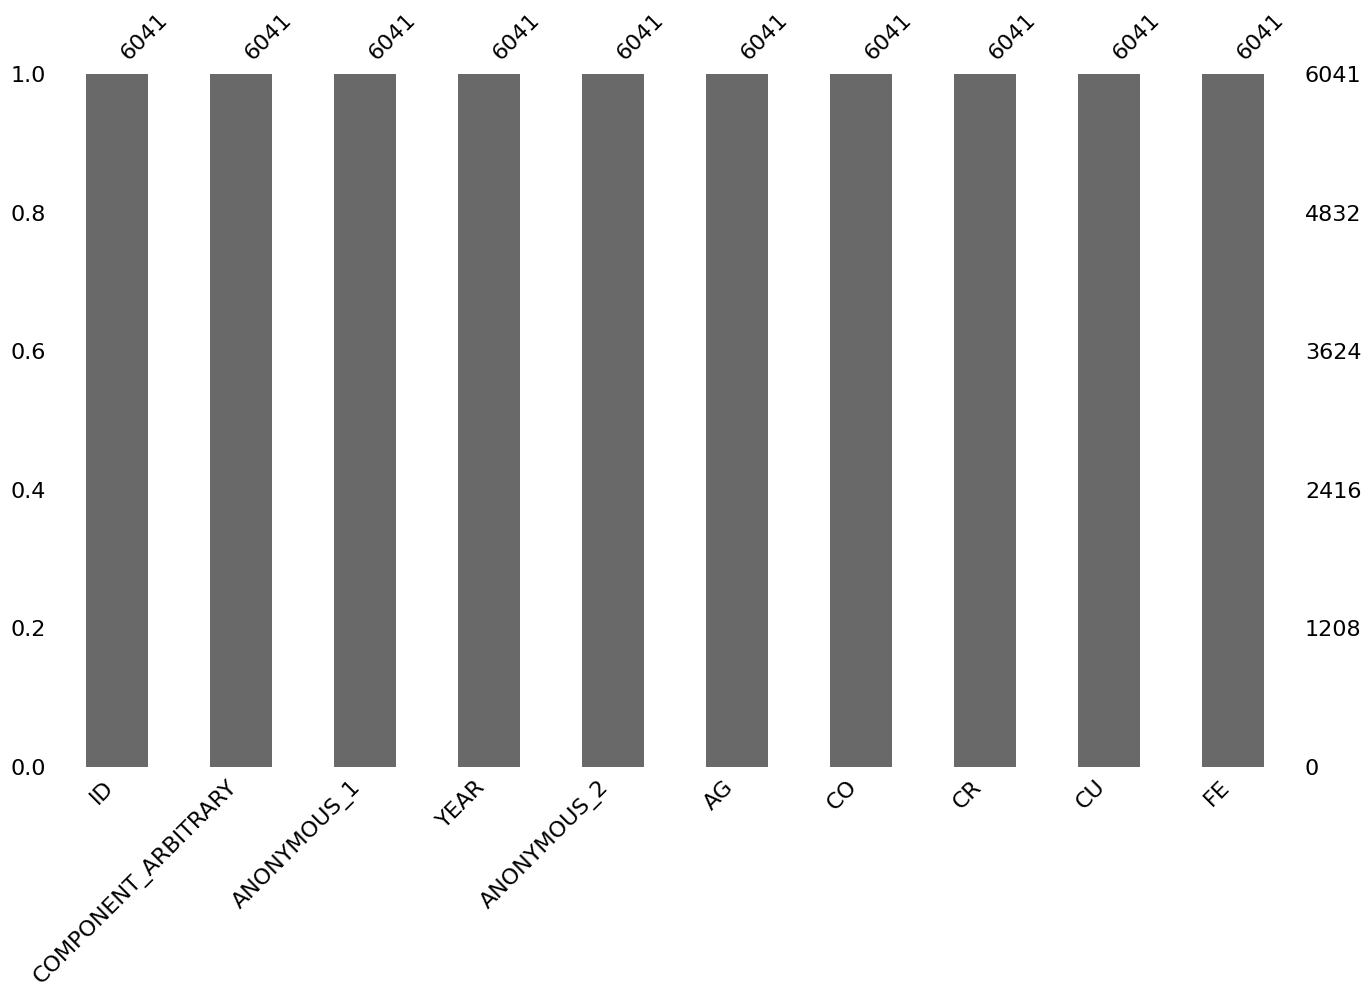

In [ ]:
import missingno as msno
msno.bar(oil_test.iloc[:, :10], figsize=(16,9))

결측치 확인 (11~)

<Axes: >

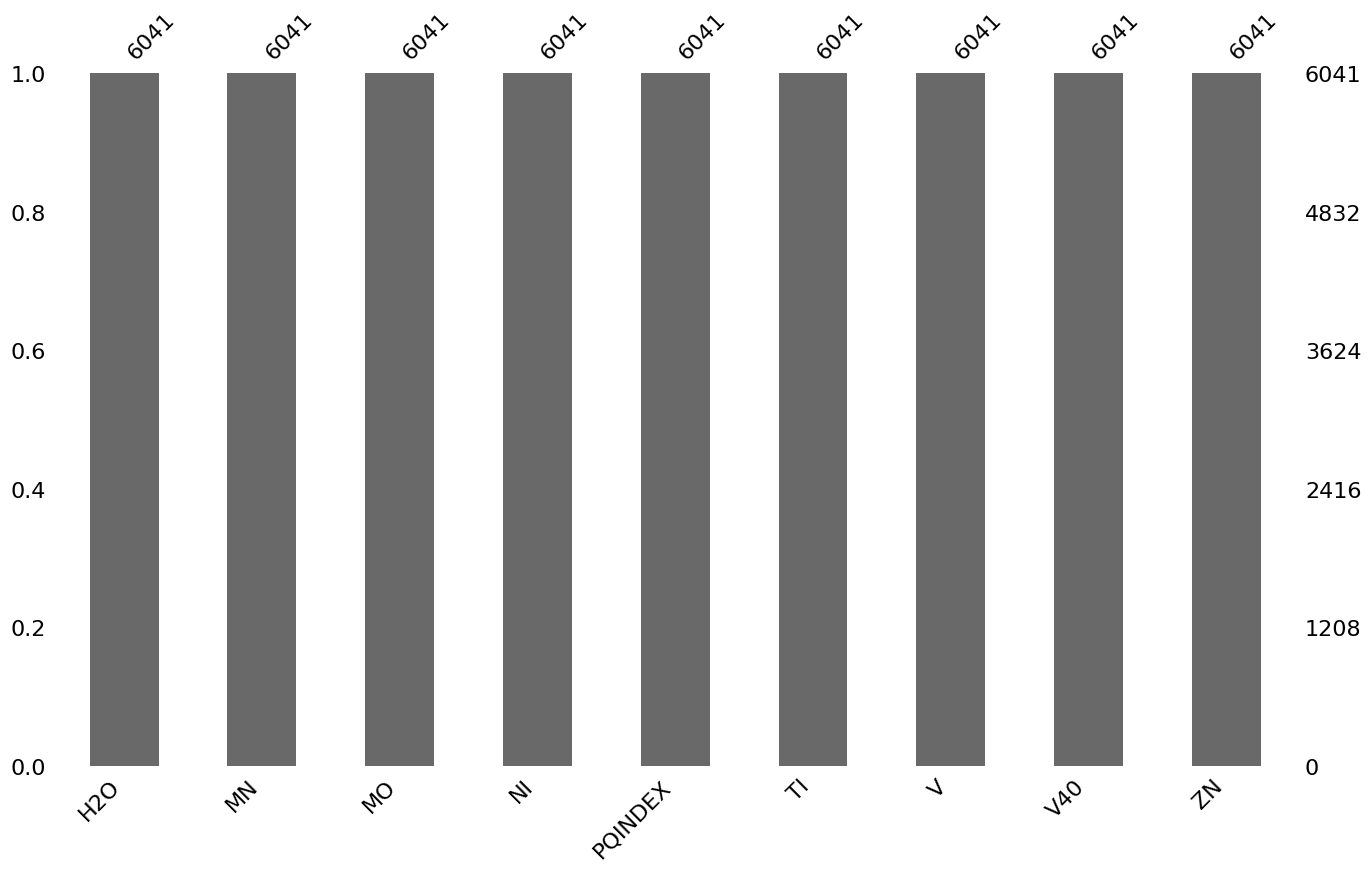

In [ ]:
msno.bar(oil_test.iloc[:, 10:], figsize=(16,9))

# 데이터셋 재구성

In [ ]:
oil_train_features = oil_train.columns
oil_train_features

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [ ]:
oil_test_features = oil_test.columns
oil_test_features

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')

In [ ]:
oil_data = pd.concat([oil_train, oil_test], ignore_index=True)

In [ ]:
#train 14000행과 test셋 6000행 합치기
#oil_data.head(3)
print(oil_data.shape)

(20136, 54)


In [ ]:
# ID와 Y_Label 버리기
oil_data = oil_data.drop(['ID','Y_LABEL'], axis=1)
oil_data.head()

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN
0,COMPONENT3,-0.996688,2011,7.0,-1.000000,0,3.0,93.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75
1,COMPONENT2,-0.997615,2021,51.0,-0.962963,0,2.0,19.0,0.0,0.0,...,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652
2,COMPONENT2,-0.990356,2015,2.0,-1.000000,0,110.0,1.0,1.0,0.0,...,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412
3,COMPONENT3,-0.956456,2010,2.0,-1.000000,0,8.0,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7
4,COMPONENT3,-0.979867,2015,4.0,-1.000000,0,1.0,157.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128


# 원-핫 인코딩 (COMPONENT_ARBITRARY 형 변환)

In [ ]:
oil_data_ohe = pd.get_dummies(oil_data, columns = ['COMPONENT_ARBITRARY'])
oil_data_ohe.head()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U6,U4,V,V100,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,-0.996688,2011,7.0,-1.000000,0,3.0,93.0,0.0,0.0,3059.0,...,NaN,NaN,0,NaN,154.0,75,0,0,1,0
1,-0.997615,2021,51.0,-0.962963,0,2.0,19.0,0.0,0.0,2978.0,...,216.0,1454.0,0,NaN,44.0,652,0,1,0,0
2,-0.990356,2015,2.0,-1.000000,0,110.0,1.0,1.0,0.0,17.0,...,11261.0,41081.0,0,NaN,72.6,412,0,1,0,0
3,-0.956456,2010,2.0,-1.000000,0,8.0,3.0,0.0,0.0,1960.0,...,NaN,NaN,0,NaN,133.3,7,0,0,1,0
4,-0.979867,2015,4.0,-1.000000,0,1.0,157.0,0.0,0.0,71.0,...,NaN,NaN,0,NaN,133.1,128,0,0,1,0


In [ ]:
oil_data_ohe = oil_data_ohe.astype({'COMPONENT_ARBITRARY_COMPONENT1':'float64'})
oil_data_ohe = oil_data_ohe.astype({'COMPONENT_ARBITRARY_COMPONENT2':'float64'})
oil_data_ohe = oil_data_ohe.astype({'COMPONENT_ARBITRARY_COMPONENT3':'float64'})
oil_data_ohe = oil_data_ohe.astype({'COMPONENT_ARBITRARY_COMPONENT4':'float64'})

In [ ]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
#uniqueSample = []

for item in list(oil_data_ohe):
    dataFeatures.append(item)

#데이터 타입
for item in dataFeatures:
    dataType.append(oil_data_ohe[item].dtype.name)

#결측치 개수
for item in dataFeatures:
    null.append(len(oil_data_ohe[oil_data_ohe[item].isnull() == True]))

#결측치 비율
for item in dataFeatures:
    nullPCT.append(round(len(oil_data_ohe[oil_data_ohe[item].isnull() == True])/len(oil_data_ohe[item])*100,2))


#가장 작은 값
for item in dataFeatures:
    minValue.append(oil_data_ohe[item].min())


#가장 큰 값
for item in dataFeatures:
    maxValue.append(oil_data_ohe[item].max())


#고유값 개수
for item in dataFeatures:
    unique.append(oil_data_ohe[item].nunique())


#고유값 샘플
#for item in dataFeatures:
#    uniqueSample.append(oil_train[item].unique()[0:2])


#데이터프레임 재생성
oil_data_ohe_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
#    'uniqueSample':uniqueSample
})
oil_data_ohe_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue
0,ANONYMOUS_1,float64,0,0.00,3201,-1.0,1.0
1,YEAR,int64,0,0.00,16,2007.0,2022.0
2,SAMPLE_TRANSFER_DAY,float64,6041,30.00,107,0.0,368.0
3,ANONYMOUS_2,float64,0,0.00,979,-1.0,1.0
4,AG,int64,0,0.00,4,0.0,3.0
5,AL,float64,6041,30.00,328,0.0,4630.0
6,B,float64,6041,30.00,504,0.0,2051.0
7,BA,float64,6041,30.00,38,0.0,216.0
8,BE,float64,6041,30.00,9,0.0,9.0
9,CA,float64,6041,30.00,2581,0.0,6609.0


결측치가 존재하는 데이터는 중요하다고 판단되지 않아, 결측치가 존재하면 버림

In [ ]:
oil_ohe_missingN = list(oil_data_ohe_info[oil_data_ohe_info['nullPCT'] >= 1]['dataFeatures'])
print(oil_ohe_missingN)

['SAMPLE_TRANSFER_DAY', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL', 'K', 'LI', 'MG', 'NA', 'P', 'PB', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V100']


In [ ]:
oil_ohe_filtered = oil_data_ohe.drop(oil_ohe_missingN, axis=1)
oil_ohe_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20136 entries, 0 to 20135
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ANONYMOUS_1                     20136 non-null  float64
 1   YEAR                            20136 non-null  int64  
 2   ANONYMOUS_2                     20136 non-null  float64
 3   AG                              20136 non-null  int64  
 4   CO                              20136 non-null  int64  
 5   CR                              20136 non-null  int64  
 6   CU                              20136 non-null  int64  
 7   FE                              20136 non-null  int64  
 8   H2O                             20136 non-null  float64
 9   MN                              20136 non-null  int64  
 10  MO                              20136 non-null  int64  
 11  NI                              20136 non-null  int64  
 12  PQINDEX                         

# MinMax 스케일러

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(oil_ohe_filtered)

In [ ]:
all_data = pd.DataFrame(scaled, columns = oil_ohe_filtered.columns)

In [ ]:
all_data

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,...,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,0.001656,0.266667,0.000000,0.0,0.0,0.005421,0.013682,0.028007,0.0,0.018244,...,0.034091,0.149821,0.012407,0.0,0.053249,0.035178,0.0,0.0,1.0,0.0
1,0.001193,0.933333,0.018519,0.0,0.0,0.000000,0.005438,0.000063,0.0,0.000000,...,0.000000,0.000335,0.000000,0.0,0.014484,0.305816,0.0,1.0,0.0,0.0
2,0.004822,0.533333,0.000000,0.0,0.0,0.000417,0.000351,0.000126,0.0,0.000000,...,0.000000,0.000300,0.000000,0.0,0.024563,0.193246,0.0,1.0,0.0,0.0
3,0.021772,0.200000,0.000000,0.0,0.0,0.000000,0.000175,0.001167,0.0,0.001140,...,0.000000,0.000775,0.000000,0.0,0.045954,0.003283,0.0,0.0,1.0,0.0
4,0.010066,0.533333,0.000000,0.0,0.0,0.000000,0.000000,0.002239,0.0,0.000000,...,0.000000,0.003823,0.000000,0.0,0.045884,0.060038,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.008366,0.666667,0.000000,0.0,0.0,0.000000,0.000175,0.000315,0.0,0.000000,...,0.000000,0.000176,0.000000,0.0,0.034395,0.553471,1.0,0.0,0.0,0.0
20132,0.007466,0.333333,0.000000,0.0,0.0,0.000000,0.001052,0.000347,0.0,0.000000,...,0.000000,0.000247,0.000000,0.0,0.021004,0.027205,0.0,1.0,0.0,0.0
20133,0.001418,0.533333,0.044021,0.0,0.0,0.000000,0.000351,0.002208,0.0,0.000000,...,0.000000,0.001409,0.000000,0.0,0.050677,0.004690,0.0,0.0,1.0,0.0
20134,0.002368,0.466667,0.000000,0.0,0.0,0.000000,0.000000,0.000158,0.0,0.000000,...,0.000000,0.000317,0.000000,0.0,0.033867,0.426360,1.0,0.0,0.0,0.0


# 훈련/ 테스트 데이터 나누기

In [ ]:
num = len(oil_train)
print('훈련데이터 행 개수:', num)

labeled = oil_train.Y_LABEL
print(labeled)

훈련데이터 행 개수: 14095
0        1
1        0
2        0
3        0
4        0
        ..
14090    0
14091    0
14092    0
14093    0
14094    1
Name: Y_LABEL, Length: 14095, dtype: int64


In [ ]:
df = all_data[:num]
df_test = all_data[num:]
print(df.shape, df_test.shape)

(14095, 21) (6041, 21)


In [ ]:
df['Y_LABEL'] = labeled
labeled

<ipython-input-46-0fb6fd500523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_LABEL'] = labeled


0        1
1        0
2        0
3        0
4        0
        ..
14090    0
14091    0
14092    0
14093    0
14094    1
Name: Y_LABEL, Length: 14095, dtype: int64

In [ ]:
df.head(3)

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,...,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4,Y_LABEL
0,0.001656,0.266667,0.000000,0.0,0.0,0.005421,0.013682,0.028007,0.0,0.018244,...,0.149821,0.012407,0.0,0.053249,0.035178,0.0,0.0,1.0,0.0,1
1,0.001193,0.933333,0.018519,0.0,0.0,0.000000,0.005438,0.000063,0.0,0.000000,...,0.000335,0.000000,0.0,0.014484,0.305816,0.0,1.0,0.0,0.0,0
2,0.004822,0.533333,0.000000,0.0,0.0,0.000417,0.000351,0.000126,0.0,0.000000,...,0.000300,0.000000,0.0,0.024563,0.193246,0.0,1.0,0.0,0.0,0


In [ ]:
df_test.head(3)

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,...,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
14095,0.002494,0.466667,0.00000,0.0,0.0,0.001251,0.007543,0.001419,0.0,0.002281,...,0.000000,0.000264,0.0,0.0,0.029109,0.472326,1.0,0.0,0.0,0.0
14096,0.007974,0.533333,0.00000,0.0,0.0,0.000000,0.000000,0.005204,0.0,0.001140,...,0.005682,0.001092,0.0,0.0,0.053778,0.016417,0.0,0.0,1.0,0.0
14097,0.011191,0.933333,0.04836,0.0,0.0,0.000417,0.002105,0.003186,0.0,0.018244,...,0.000000,0.002784,0.0,0.0,0.015471,0.694184,0.0,0.0,1.0,0.0


In [ ]:
list(df_test.columns)

['ANONYMOUS_1',
 'YEAR',
 'ANONYMOUS_2',
 'AG',
 'CO',
 'CR',
 'CU',
 'FE',
 'H2O',
 'MN',
 'MO',
 'NI',
 'PQINDEX',
 'TI',
 'V',
 'V40',
 'ZN',
 'COMPONENT_ARBITRARY_COMPONENT1',
 'COMPONENT_ARBITRARY_COMPONENT2',
 'COMPONENT_ARBITRARY_COMPONENT3',
 'COMPONENT_ARBITRARY_COMPONENT4']

In [ ]:
df_test = df_test[['ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN', 'COMPONENT_ARBITRARY_COMPONENT1', 'COMPONENT_ARBITRARY_COMPONENT2',
 'COMPONENT_ARBITRARY_COMPONENT3',
 'COMPONENT_ARBITRARY_COMPONENT4']]

In [ ]:
df_test

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,...,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
14095,0.002494,0.466667,0.000000,0.0,0.0,0.001251,0.007543,0.001419,0.0,0.002281,...,0.000000,0.000264,0.0,0.0,0.029109,0.472326,1.0,0.0,0.0,0.0
14096,0.007974,0.533333,0.000000,0.0,0.0,0.000000,0.000000,0.005204,0.0,0.001140,...,0.005682,0.001092,0.0,0.0,0.053778,0.016417,0.0,0.0,1.0,0.0
14097,0.011191,0.933333,0.048360,0.0,0.0,0.000417,0.002105,0.003186,0.0,0.018244,...,0.000000,0.002784,0.0,0.0,0.015471,0.694184,0.0,0.0,1.0,0.0
14098,0.005797,0.200000,0.000000,0.0,0.0,0.002502,0.001228,0.002082,0.0,0.001140,...,0.017045,0.000247,0.0,0.0,0.037708,0.479831,1.0,0.0,0.0,0.0
14099,0.007187,0.666667,0.000000,0.0,0.0,0.000000,0.000877,0.000095,0.0,0.000000,...,0.000000,0.000141,0.0,0.0,0.015471,0.176829,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20131,0.008366,0.666667,0.000000,0.0,0.0,0.000000,0.000175,0.000315,0.0,0.000000,...,0.000000,0.000176,0.0,0.0,0.034395,0.553471,1.0,0.0,0.0,0.0
20132,0.007466,0.333333,0.000000,0.0,0.0,0.000000,0.001052,0.000347,0.0,0.000000,...,0.000000,0.000247,0.0,0.0,0.021004,0.027205,0.0,1.0,0.0,0.0
20133,0.001418,0.533333,0.044021,0.0,0.0,0.000000,0.000351,0.002208,0.0,0.000000,...,0.000000,0.001409,0.0,0.0,0.050677,0.004690,0.0,0.0,1.0,0.0
20134,0.002368,0.466667,0.000000,0.0,0.0,0.000000,0.000000,0.000158,0.0,0.000000,...,0.000000,0.000317,0.0,0.0,0.033867,0.426360,1.0,0.0,0.0,0.0


# 모델 생성

## GBM model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
gbm_model = GradientBoostingClassifier()

In [ ]:
# teacher model
gbm_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

GradientBoostingClassifier()

In [ ]:
y_pred_prob = gbm_model.predict_proba(df.iloc[:, :-1])

In [ ]:
y_pred_prob

array([[0.05262971, 0.94737029],
       [0.87356905, 0.12643095],
       [0.93094897, 0.06905103],
       ...,
       [0.75536386, 0.24463614],
       [0.9432799 , 0.0567201 ],
       [0.21200158, 0.78799842]])

In [ ]:
y_pred_prob.shape

(14095, 2)

In [ ]:
y_pred_prob[:, 1]

array([0.94737029, 0.12643095, 0.06905103, ..., 0.24463614, 0.0567201 ,
       0.78799842])

In [ ]:
gbm_model_regressor = GradientBoostingRegressor()

In [ ]:
df_oil_sub = df[df_test.columns]
df_oil_sub.head()

,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,...,NI,PQINDEX,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,0.001656,0.266667,0.000000,0.0,0.0,0.005421,0.013682,0.028007,0.0,0.018244,...,0.034091,0.149821,0.012407,0.0,0.053249,0.035178,0.0,0.0,1.0,0.0
1,0.001193,0.933333,0.018519,0.0,0.0,0.000000,0.005438,0.000063,0.0,0.000000,...,0.000000,0.000335,0.000000,0.0,0.014484,0.305816,0.0,1.0,0.0,0.0
2,0.004822,0.533333,0.000000,0.0,0.0,0.000417,0.000351,0.000126,0.0,0.000000,...,0.000000,0.000300,0.000000,0.0,0.024563,0.193246,0.0,1.0,0.0,0.0
3,0.021772,0.200000,0.000000,0.0,0.0,0.000000,0.000175,0.001167,0.0,0.001140,...,0.000000,0.000775,0.000000,0.0,0.045954,0.003283,0.0,0.0,1.0,0.0
4,0.010066,0.533333,0.000000,0.0,0.0,0.000000,0.000000,0.002239,0.0,0.000000,...,0.000000,0.003823,0.000000,0.0,0.045884,0.060038,0.0,0.0,1.0,0.0


In [ ]:
gbm_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

GradientBoostingRegressor()

In [ ]:
y_pred = gbm_model_regressor.predict(df_test)

In [ ]:
oil_ss.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))

In [ ]:
oil_ss

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
6036,TEST_6036,0
6037,TEST_6037,0
6038,TEST_6038,0
6039,TEST_6039,0


In [ ]:
oil_ss.Y_LABEL.value_counts()

0    4978
1    1063
Name: Y_LABEL, dtype: int64

In [ ]:
oil_ss.loc[oil_ss.Y_LABEL == 1]

,ID,Y_LABEL
5,TEST_0005,1
9,TEST_0009,1
10,TEST_0010,1
21,TEST_0021,1
23,TEST_0023,1
...,...,...
6029,TEST_6029,1
6030,TEST_6030,1
6031,TEST_6031,1
6034,TEST_6034,1


In [ ]:
file_path = '/content/drive/MyDrive/GBTHackerton/submission/'
oil_ss.to_csv(file_path + 'submissionGB.csv', index=False)

In [ ]:
file_path = '/content/drive/MyDrive/GBTHackerton/submission/'

## XGBoost model

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_prob = xgb_model.predict_proba(df.iloc[:, :-1])

In [ ]:
xgb_model_regressor = xgb.XGBRegressor()

In [ ]:
xgb_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = gbm_model_regressor.predict(df_test)

In [ ]:
oil_ss.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))

In [ ]:
oil_ss.Y_LABEL.value_counts()

0    4978
1    1063
Name: Y_LABEL, dtype: int64

In [ ]:
oil_ss.loc[oil_ss.Y_LABEL == 1]

,ID,Y_LABEL
5,TEST_0005,1
9,TEST_0009,1
10,TEST_0010,1
21,TEST_0021,1
23,TEST_0023,1
...,...,...
6029,TEST_6029,1
6030,TEST_6030,1
6031,TEST_6031,1
6034,TEST_6034,1


In [ ]:
oil_ss.to_csv(file_path + 'submissionXGB.csv', index=False)

## LightGBM model

In [ ]:
# !pip install lightbgm

In [ ]:
import lightgbm as lgbm

In [ ]:
lgbm_model = lgbm.LGBMClassifier()

In [ ]:
lgbm_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

[LightGBM] [Info] Number of positive: 3024, number of negative: 11071
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data points in the train set: 14095, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214544 -> initscore=-1.297749
[LightGBM] [Info] Start training from score -1.297749


LGBMClassifier()

In [ ]:
y_pred_prob = lgbm_model.predict_proba(df.iloc[:, :-1])

In [ ]:
lgbm_model_regressor = lgbm.LGBMRegressor()

In [ ]:
lgbm_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data points in the train set: 14095, number of used features: 21
[LightGBM] [Info] Start training from score 0.214649


LGBMRegressor()

In [ ]:
y_pred = lgbm_model_regressor.predict(df_test)

In [ ]:
oil_ss.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))

In [ ]:
oil_ss.Y_LABEL.value_counts()

0    4917
1    1124
Name: Y_LABEL, dtype: int64

In [ ]:
oil_ss.loc[oil_ss.Y_LABEL == 1]

,ID,Y_LABEL
3,TEST_0003,1
5,TEST_0005,1
6,TEST_0006,1
9,TEST_0009,1
10,TEST_0010,1
...,...,...
6029,TEST_6029,1
6030,TEST_6030,1
6031,TEST_6031,1
6035,TEST_6035,1


In [ ]:
#file_path = '/content/drive/MyDrive/[03]Python_Data_Analysis/[13]Dacon/[01]oil/'
oil_ss.to_csv(file_path + 'submissionLGBM.csv', index=False)

## CatBoost model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00


In [ ]:
import catboost as cb

In [ ]:
cb_model = cb.CatBoostClassifier()

In [ ]:
cb_model.fit(df.iloc[:, :-1], df.iloc[:, -1])

Learning rate set to 0.031885
0:	learn: 0.6694067	total: 78.8ms	remaining: 1m 18s
1:	learn: 0.6468053	total: 99.1ms	remaining: 49.4s
2:	learn: 0.6255641	total: 123ms	remaining: 40.9s
3:	learn: 0.6062706	total: 133ms	remaining: 33.2s
4:	learn: 0.5890015	total: 143ms	remaining: 28.4s
5:	learn: 0.5730865	total: 152ms	remaining: 25.2s
6:	learn: 0.5573838	total: 175ms	remaining: 24.8s
7:	learn: 0.5426104	total: 212ms	remaining: 26.3s
8:	learn: 0.5281528	total: 228ms	remaining: 25.1s
9:	learn: 0.5159243	total: 247ms	remaining: 24.4s
10:	learn: 0.5020974	total: 267ms	remaining: 24s
11:	learn: 0.4918338	total: 286ms	remaining: 23.6s
12:	learn: 0.4804923	total: 308ms	remaining: 23.4s
13:	learn: 0.4713686	total: 326ms	remaining: 23s
14:	learn: 0.4632441	total: 345ms	remaining: 22.6s
15:	learn: 0.4537310	total: 363ms	remaining: 22.3s
16:	learn: 0.4464523	total: 383ms	remaining: 22.1s
17:	learn: 0.4398089	total: 401ms	remaining: 21.9s
18:	learn: 0.4328120	total: 428ms	remaining: 22.1s
19:	learn: 0

In [ ]:
y_pred_prob = cb_model.predict_proba(df.iloc[:, :-1])

In [ ]:
cb_model_regressor = cb.CatBoostRegressor()

In [ ]:
cb_model_regressor.fit(df_oil_sub, y_pred_prob[:, 1])

Learning rate set to 0.062192
0:	learn: 0.2825343	total: 16.1ms	remaining: 16.1s
1:	learn: 0.2708292	total: 29.6ms	remaining: 14.8s
2:	learn: 0.2606945	total: 44.3ms	remaining: 14.7s
3:	learn: 0.2511588	total: 54.5ms	remaining: 13.6s
4:	learn: 0.2429257	total: 61.3ms	remaining: 12.2s
5:	learn: 0.2342292	total: 68ms	remaining: 11.3s
6:	learn: 0.2261095	total: 74.2ms	remaining: 10.5s
7:	learn: 0.2189802	total: 81.3ms	remaining: 10.1s
8:	learn: 0.2123994	total: 87.3ms	remaining: 9.61s
9:	learn: 0.2050272	total: 94.1ms	remaining: 9.32s
10:	learn: 0.1982382	total: 101ms	remaining: 9.1s
11:	learn: 0.1927016	total: 116ms	remaining: 9.55s
12:	learn: 0.1868217	total: 125ms	remaining: 9.46s
13:	learn: 0.1822570	total: 135ms	remaining: 9.54s
14:	learn: 0.1781869	total: 143ms	remaining: 9.4s
15:	learn: 0.1743947	total: 153ms	remaining: 9.44s
16:	learn: 0.1709258	total: 159ms	remaining: 9.2s
17:	learn: 0.1672087	total: 164ms	remaining: 8.95s
18:	learn: 0.1643977	total: 183ms	remaining: 9.43s
19:	le

In [ ]:
y_pred = cb_model_regressor.predict(df_test)

In [ ]:
oil_ss.Y_LABEL = pd.Series(np.where(y_pred >=0.5, 1, 0))

In [ ]:
oil_ss.Y_LABEL.value_counts()

0    4910
1    1131
Name: Y_LABEL, dtype: int64

In [ ]:
oil_ss.loc[oil_ss.Y_LABEL == 1]

,ID,Y_LABEL
5,TEST_0005,1
9,TEST_0009,1
10,TEST_0010,1
21,TEST_0021,1
23,TEST_0023,1
...,...,...
6029,TEST_6029,1
6030,TEST_6030,1
6031,TEST_6031,1
6035,TEST_6035,1


In [ ]:
oil_ss.to_csv(file_path + 'submissionCB.csv', index=False)

# 결론: 결측치가 존재하는 칼럼들은 모두 버린 후, Catboost 성능이 가장 좋았음
### private 데이터가 존재하기 때문에, 하이퍼파라미터는 딱히 수행해보지 않는것이 어떨까 하는 판단